In [113]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [114]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.special

import time
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

from numpy import sin, cos, power


In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np

from scipy.optimize import minimize
#from qutip import *
#from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

In [116]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

## Time-evolution of Weyl-symbols

\begin{align}
\partial_{t}F_{10}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{31}^{x}+\alpha_{{\rm R},x}F_{31}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{31}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{20}^{x}+\alpha_{{\rm L},x}F_{20}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{20}^{y},\\
\partial_{t}F_{20}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{32}^{x}+\alpha_{{\rm R},x}F_{32}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{32}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{10}^{x}-\alpha_{{\rm L},x}F_{10}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{10}^{y},\\
\partial_{t}F_{30}^{x} & =-\sqrt{2}g_{{\rm R}}\alpha_{{\rm R},y}\left(1-F_{2}-F_{1}-2F_{0}\right),\\
\partial_{t}F_{21}^{x} & =-\sqrt{2}g_{{\rm L}}\alpha_{{\rm L},y}\left(F_{2}-F_{1}\right),\\
\partial_{t}F_{31}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{10}^{x}+\alpha_{{\rm R},x}F_{10}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{10.i}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{32}^{x}-\alpha_{{\rm L},x}F_{32}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{32}^{y},\\
\partial_{t}F_{32}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{20}^{x}+\alpha_{{\rm R},x}F_{20}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{20}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{31}^{x}+\alpha_{{\rm L},x}F_{31}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{31}^{y},\\
\partial_{t}F_{10}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{31}^{x}-\alpha_{{\rm R},y}F_{31}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{31}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{20}^{x}-\alpha_{{\rm L},y}F_{20}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{20}^{x},\\
\partial_{t}F_{20}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{32}^{x}-\alpha_{{\rm R},y}F_{32}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{32}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{10}^{x}+\alpha_{{\rm L},y}F_{10}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{10}^{x},\\
\partial_{t}F_{30}^{y} & =-\left(2g_{{\rm R}}\alpha_{{\rm R},x}+\Omega_{{\rm R}}\right)\left(1-F_{2}-F_{1}-2F_{0}\right)/\sqrt{2},\\
\partial_{t}F_{21}^{y} & =-\left(2g_{{\rm L}}\alpha_{{\rm L},x}+\Omega_{{\rm L}}\right)\left(F_{2}-F_{1}\right)/\sqrt{2},\\
\partial_{t}F_{31}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{10}^{x}-\alpha_{{\rm R},y}F_{10}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{10}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{32}^{x}+\alpha_{{\rm L},y}F_{32}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{32}^{x},\\
\partial_{t}F_{32}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{20}^{x}-\alpha_{{\rm R},y}F_{20}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{20}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{31}^{x}-\alpha_{{\rm L},y}F_{31}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{31}^{x},\\
\partial_{t}F_{0} & =-\sqrt{2}\left(g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{30}^{x}+\alpha_{{\rm R},x}F_{30}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{30}^{y}\right),\\
\partial_{t}F_{1} & =-\sqrt{2}\left(g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{21}^{x}+\alpha_{{\rm L},x}F_{21}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{21}^{y}\right),\\
\partial_{t}F_{2} & =\sqrt{2}\left(g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{21}^{x}+\alpha_{{\rm L},x}F_{21}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{21}^{y}\right),\\
\partial_{t}\alpha_{{\rm R},x} & =-\frac{g_{{\rm R}}}{\sqrt{2}}F_{30}^{y}-\Delta_{{\rm R}}\alpha_{{\rm R},y}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},x}+\sqrt{\frac{\kappa_{{\rm R}}}{4}}{\rm d}W_{1},\\
\partial_{t}\alpha_{{\rm R},y} & =-\frac{g_{{\rm R}}}{\sqrt{2}}F_{30}^{x}+\Delta_{{\rm R}}\alpha_{{\rm R},x}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},y}+\sqrt{\frac{\kappa_{R}}{4}}{\rm d}W_{2}.\\
\partial_{t}\alpha_{{\rm L},x} & =-\frac{g_{{\rm L}}}{\sqrt{2}}F_{21}^{y}-\Delta_{{\rm L}}\alpha_{{\rm L},y}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},x}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{3},\\
\partial_{t}\alpha_{{\rm L},y} & =-\frac{g_{{\rm L}}}{\sqrt{2}}F_{21}^{x}+\Delta_{{\rm L}}\alpha_{{\rm L},x}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},y}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{4}.
\end{align}

## Wigner discrete distribution for $\left|\psi_{i}\left(0\right)\right\rangle =\cos\left(\frac{\theta}{2}\right)\left|0\right\rangle +{\rm e}^{{\rm i}\phi}\sin\left(\frac{\theta}{2}\right)\left|1\right\rangle $


\begin{align}
\lambda_{10,x} & =\left(\mu_{10,x}=\frac{\cos\left(\phi\right)\sin\left(\theta\right)}{\sqrt{2}},\sigma_{10,x}^{2}=\frac{1-\left(\cos\left(\phi\right)\sin\left(\theta\right)\right)^{2}}{2}\right),\\
\lambda_{20,x} & =\left(\mu_{20,x}=0,\sigma_{20,x}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{30,x} & =\left(\mu_{30,x}=0,\sigma_{30,x}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{21,x} & =\left(\mu_{21,x}=0,\sigma_{21,x}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{31,x} & =\left(\mu_{31,x}=0,\sigma_{31,x}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{32,x} & =\left(\mu_{32,x}=0,\sigma_{32,x}^{2}=0\right)=0,\\
\lambda_{10,y} & =\left(\mu_{10,y}=\frac{\sin\left(\phi\right)\sin\left(\theta\right)}{\sqrt{2}},\sigma_{31,x}^{2}=\frac{1-\left(\sin\left(\phi\right)\sin\left(\theta\right)\right)^{2}}{2}\right),\\
\lambda_{20,y} & =\left(\mu_{20,y}=0,\sigma_{20,y}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{30,y} & =\left(\mu_{30,y}=0,\sigma_{30,y}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{21,y} & =\left(\mu_{21,y}=0,\sigma_{21,y}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{31,y} & =\left(\mu_{31,y}=0,\sigma_{31,y}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{32,y} & =\left(\mu_{32,y}=0,\sigma_{32,y}^{2}=0\right)=0,\\
\lambda_{0,z} & =\left(\mu_{0,z}=\cos^{2}\left(\frac{\theta}{2}\right),\sigma_{0,z}^{2}=\sin^{2}\left(\frac{\theta}{2}\right)\cos^{2}\left(\frac{\theta}{2}\right)\right),\\
\lambda_{1,z} & =\left(\mu_{1,z}=\sin^{2}\left(\frac{\theta}{2}\right),\sigma_{1,z}^{2}=\sin^{2}\left(\frac{\theta}{2}\right)\cos^{2}\left(\frac{\theta}{2}\right)\right),\\
\lambda_{2,z} & =\left(\mu_{2,z}=0,\sigma_{2,z}^{2}=0\right)=0.
\end{align}

## Euler-Maruyama

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin



from numba import jit

dt = 0.0001 # Time step.
T = 100 # Total time.
n = int(T / dt) # Number of time steps.
steps=int(T/dt)

times = np.linspace(0., T, n)


N=80

gR=1
DeltaR=0
KapR=20
OmegaR=0.5*2*N/KapR 


gL=1
DeltaL=0
KapL=20
OmegaL=0.5*2*N/KapL 


    

Gamma_du=0  #Fixed


sqrt_N=np.sqrt(N)



#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>


theta = np.pi/2
phi   = 0

#-----------------------------------------------------------------------------------------------------



from scipy import stats

mk = np.array([-1/sqrt(2),0,1/sqrt(2)])

mzk=np.array([0,1])


mux10, sigmax10 = (N)*cos(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (cos(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
mux20, sigmax20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux30, sigmax30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux21, sigmax21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux31, sigmax31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux32, sigmax32 = 0                                ,0                                 # mean and standard deviation

muy10, sigmay10 = (N)*sin(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (sin(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
muy20, sigmay20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy30, sigmay30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy21, sigmay21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy31, sigmay31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy32, sigmay32 = 0                                ,0                                 # mean and standard deviation

muz0, sigmaz0 = (N)*(cos(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz1, sigmaz1 = (N)*(sin(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz2, sigmaz2 = 0                      , 0           # mean and standard deviation


@jit

def trayectory(N,Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((19, n))
    
    Results[15][0]   = np.random.normal(0, 0.5)
    Results[16][0] = np.random.normal(0, 0.5)
    Results[17][0] = np.random.normal(0, 0.5)
    Results[18][0] = np.random.normal(0, 0.5)
    
    
    Results[0][0] =np.random.normal(mux10, sigmax10, 1)[0]  #x10  
    Results[1][0] =np.random.normal(mux20, sigmax20, 1)[0]  #x20
    Results[2][0] =np.random.normal(mux30, sigmax30, 1)[0]  #x30
    Results[3][0] =np.random.normal(mux21, sigmax21, 1)[0]  #x21
    Results[4][0] =np.random.normal(mux31, sigmax31, 1)[0]  #x31
    Results[5][0] =np.random.normal(mux32, sigmax32, 1)[0]  #x32
        
    Results[6][0] =np.random.normal(muy10, sigmay10, 1)[0]  #y10
    Results[7][0] =np.random.normal(muy20, sigmay20, 1)[0]  #y20
    Results[8][0] =np.random.normal(muy30, sigmay30, 1)[0]  #y30
    Results[9][0] =np.random.normal(muy21, sigmay21, 1)[0]  #y21
    Results[10][0]=np.random.normal(muy31, sigmay31, 1)[0]  #y31
    Results[11][0]=np.random.normal(muy32, sigmay32, 1)[0]  #y32
        
    Results[12][0]=np.random.normal(muz0, sigmaz0, 1)[0]  #z0
    Results[13][0]=np.random.normal(muz1, sigmaz1, 1)[0]  #z2
    Results[14][0]=np.random.normal(muz2, sigmaz2, 1)[0]  #z3
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
        
        
        
          
                
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 -(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 -(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        
            
            
        Results[0][t+1] = s10x  +dt*(-gR)*(alpRx*s31y+alpRy*s31x) +dt*(-OmegaR/2)*s31y-\
            dt*gL*(alpLx*s20y+alpLy*s20x)+dt*(-OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(alpRx*s32y+alpRy*s32x) +dt*(-OmegaR/2)*s32y-\
            dt*gL*(alpLx*s10y-alpLy*s10x)+dt*(-OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(1-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRx*s10y+alpRy*s10x)+dt*(OmegaR/2)*s10y+\
            dt*gL*(alpLx*s32y-alpLy*s32x)+dt*(OmegaL/2)*s32y
            
        Results[5][t+1] = s32x  +dt*gR*(alpRx*s20y+alpRy*s20x)+dt*(OmegaR/2)*s20y+\
            dt*gL*(alpLx*s31y+alpLy*s31x)+dt*(OmegaL/2)*s31y
            
        Results[6][t+1] = s10y  +dt*(-gR)*(alpRx*s31x-alpRy*s31y)-dt*(OmegaR/2)*s31x+\
            dt*gL*(alpLx*s20x-alpLy*s20y)+dt*(OmegaL/2)*s20x
            
        Results[7][t+1] = s20y  +dt*(-gR)*(alpRx*s32x-alpRy*s32y)-dt*(OmegaR/2)*s32x+\
            dt*gL*(alpLx*s10x+alpLy*s10y)+dt*(OmegaL/2)*s10x
            
        Results[8][t+1] = s30y  -dt*(2*gR*alpRx+OmegaR)*( 1-s2z-s1z-2*s0z  )/sqrt(2)
            
        Results[9][t+1] = s21y  -dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
            
        Results[10][t+1] = s31y + dt*gR*(alpRx*s10x-alpRy*s10y)+dt*(OmegaR/2)*s10x-\
            dt*gL*(alpLx*s32x+alpLy*s32y)-dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*gR*(alpRx*s20x-alpRy*s20y)+dt*(OmegaR/2)*s20x-\
            dt*gL*(alpLx*s31x-alpLy*s31y)-dt*(OmegaL/2)*s31x
            
        Results[12][t+1] = s0z+ dt*(-sqrt(2))*(gR*(alpRy*s30x+alpRx*s30y)+ (OmegaR/2)*s30y )
            
            
        Results[13][t+1] = s1z+ dt*(-sqrt(2))*(gL*(alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

        Results[14][t+1] = s2z+ dt*(sqrt(2))*(gL*(alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


In [119]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory(N,Stochastic)
        Results=add(Results,Trayec)
    
    return Results/itera
    
    
    
    

In [ ]:
t0=time.time()

itera=500

Result_varDDTWA_EM = averages(1,itera=itera,N=N,n=n)
#Result_varDTWA_EM  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

In [ ]:
N

## Results DDTWA Collective

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_x$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[0]/sqrt(2),"--",label="$S^x_{10}$ DDTWA Collective")

plt.plot(times, Result_varDDTWA_EM[1]/sqrt(2),"--",label="$S^x_{20}$ DDTWA Collective")

plt.plot(times, Result_varDDTWA_EM[2]/sqrt(2),"--",label="$S^x_{30}$ DDTWA Collective")

plt.plot(times, Result_varDDTWA_EM[3]/sqrt(2),"--",label="$S^x_{21}$ DDTWA Collective")

plt.plot(times, Result_varDDTWA_EM[4]/sqrt(2),"--",label="$S^x_{31}$ DDTWA Collective")

plt.plot(times, Result_varDDTWA_EM[5]/sqrt(2),"--",label="$S^x_{32}$ DDTWA Collective")


plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
N

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_y$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[6]/sqrt(2),"--",label="$S^y_{10}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[7]/sqrt(2),"--",label="$S^y_{20}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[8]/sqrt(2),"--",label="$S^y_{30}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[9]/sqrt(2),"--",label="$S^y_{21}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[10]/sqrt(2),"--",label="$S^y_{31}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[11]/sqrt(2),"--",label="$S^y_{32}$ DDTWA EM")


plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[12],"--",label="$S^z_{0}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[13],"--",label="$S^z_{1}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[14],"--",label="$S^z_{2}$ DDTWA EM")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<a_{j\gamma}>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a_{j\gamma} \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[15],"--",label="$<a_{Rx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[16],"--",label="$<a_{Ry}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[17],"--",label="$<a_{Lx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[18],"--",label="$<a_{Ly}>$ DDTWA EM")




plt.plot(times, 0*times,"-",label="$<a>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

## Comparison DDTWA and DTWA

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_x$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[0],"--",label="$S^x_{10}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[1],"--",label="$S^x_{20}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[2],"--",label="$S^x_{30}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[3],"--",label="$S^x_{21}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[4],"--",label="$S^x_{31}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[5],"--",label="$S^x_{32}$ DDTWA EM")




plt.plot(times, Result_varDTWA_EM[0],"-",label="$S^x_{10}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[1],"-",label="$S^x_{20}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[2],"-",label="$S^x_{30}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[3],"-",label="$S^x_{21}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[4],"-",label="$S^x_{31}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[5],"-",label="$S^x_{32}$ DTWA EM")


plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_y$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[6],"--",label="$S^y_{10}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[7],"--",label="$S^y_{20}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[8],"--",label="$S^y_{30}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[9],"--",label="$S^y_{21}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[10],"--",label="$S^y_{31}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[11],"--",label="$S^y_{32}$ DDTWA EM")




plt.plot(times, Result_varDTWA_EM[6],"-",label="$S^y_{10}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[7],"-",label="$S^y_{20}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[8],"-",label="$S^y_{30}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[9],"-",label="$S^y_{21}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[10],"-",label="$S^y_{31}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[11],"-",label="$S^y_{32}$ DTWA EM")



plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[12],"--",label="$S^z_{0}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[13],"--",label="$S^z_{1}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[14],"--",label="$S^z_{2}$ DDTWA EM")


plt.plot(times, Result_varDTWA_EM[12],"-",label="$S^z_{0}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[13],"-",label="$S^z_{1}$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[14],"-",label="$S^z_{2}$ DTWA EM")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<a_{j\gamma}>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a_{j\gamma} \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[15],"--",label="$<a_{Rx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[16],"--",label="$<a_{Ry}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[17],"--",label="$<a_{Lx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[18],"--",label="$<a_{Ly}>$ DDTWA EM")



plt.plot(times, Result_varDTWA_EM[15],"-",label="$<a_{Rx}>$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[16],"-",label="$<a_{Ry}>$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[17],"-",label="$<a_{Lx}>$ DTWA EM")

plt.plot(times, Result_varDTWA_EM[18],"-",label="$<a_{Ly}>$ DTWA EM")




plt.plot(times, 0*times,"-",label="$<a>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

## Bad cavity limit check

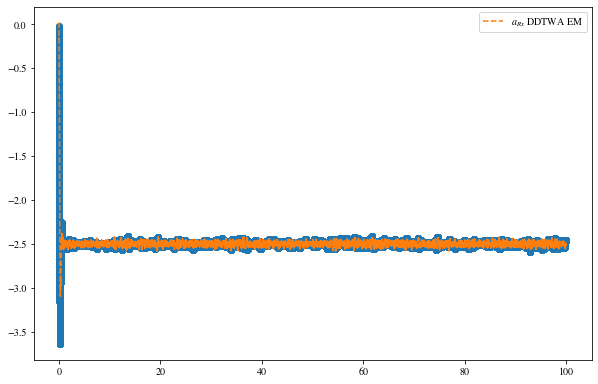

In [112]:
C_R=-gR/((KapR/2)**2+DeltaR**2)


C_L=-gL/((KapL/2)**2+DeltaL**2)

S30x=Result_varDDTWA_EM[2]/sqrt(2)
S30y=Result_varDDTWA_EM[8]/sqrt(2)
S21x=Result_varDDTWA_EM[3]/sqrt(2)
S21y=Result_varDDTWA_EM[9]/sqrt(2)

aRx_est=C_R*((KapR/2)* S30y-DeltaR* S30x )
aRy_est=C_R*((KapR/2)* S30x+DeltaR* S30y )
aLx_est=C_L*((KapL/2)* S21y-DeltaL* S21x )
aLy_est=C_L*((KapL/2)* S21x+DeltaL* S21y )


#plt.plot(times,aRx_est,"-o")
#plt.plot(times,aRy_est,"-o")
#plt.plot(times,aLx_est,"-o")
#plt.plot(times,aLy_est,"-o")



#plt.plot(times, Result_varDDTWA_EM[15],"--",label="$a_{Rx}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[16],"--",label="$a_{Ry}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[17],"--",label="$a_{Lx}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[18],"--",label="$a_{Ly}$ DDTWA EM")


plt.legend()

## Averaging

In [ ]:
from scipy import integrate

In [ ]:
def time_averaging(array,indexes):
    result=[]
    lower_index=int(0.5*len(array))
    
    
    for j in range(len(array)):
        if j<lower_index:
            x=times[j:j+indexes]
            y=array[j:j+indexes]
            y_aver=integrate.trapz(y, x)/(x[-1]-x[0])
            result.append(y_aver)
            
        else:
            x=times[j-indexes:j]
            y=array[j-indexes:j]
            y_aver=integrate.trapz(y, x)/(x[-1]-x[0])
            result.append(y_aver)
    
    return result

In [ ]:
for j in range(12): 
    plt.plot(times,Result_varDDTWA_EM[j])

## Description of relevant dynamic operators

In [ ]:
plt.plot(times, Result_varDDTWA_EM[0],"--",label="$G_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[1],"--",label="$M_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[4],"--",label="$P_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[5],"--",label="$E_x$ DDTWA EM")

#plt.plot(times, Result_varDTWA[0],"--",label="$G_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[1],"--",label="$M_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[4],"--",label="$P_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[5],"--",label="$E_x$ DTWA EM")

plt.legend()

In [ ]:
plt.plot(times, Result_varDDTWA_EM[6],"--" ,label="$G_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[7],"--" ,label="$M_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[10],"--",label="$P_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[11],"--",label="$E_y$ DDTWA EM")

#plt.plot(times, Result_varDTWA[6],"--",label="$G_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[7],"--",label="$M_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[10],"--",label="$P_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[11],"--",label="$E_x$ DTWA EM")

plt.legend()

## L and R dynamics

In [ ]:
plt.plot(times, Result_varDDTWA_EM[2],"--",label="$R_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[3],"--",label="$L_x$ DDTWA EM")

plt.legend()

In [ ]:
plt.plot(times, Result_varDDTWA_EM[8],"--" ,label="$R_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[9],"--" ,label="$L_y$ DDTWA EM")


#plt.plot(times, Result_varDTWA[6],"--",label="$G_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[7],"--",label="$M_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[10],"--",label="$P_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[11],"--",label="$E_x$ DTWA EM")

plt.legend()

## Fitting of $\left< G_{x,y} \right>$ for $\left|\psi\right>=\frac{\left|0\right>+\left|1\right>}{\sqrt{2}}$ solely

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def decaying_sinusoid(t, a, lam):
    return a * np.exp(lam * t)

t_index=300000

popt, pcov = curve_fit(decaying_sinusoid,
                       times[:t_index],
                       Result_varDDTWA_EM[0][:t_index],
                       p0=(50, -0.1))

fig, ax = plt.subplots(1, 1)

timc=times[:t_index]

plt.title("Quantum Dynamics of $<G_x>$")

ax.plot(timc, Result_varDDTWA_EM[0][:t_index],label="$<G_x>$ estimation under DDTWA");
ax.plot(timc, popt[0]*np.exp(popt[1]*np.array(timc)),label="Exponential decay Estimation");

plt.legend()




In [ ]:
print(popt[0],popt[1])


In [ ]:
#S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
#S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
#S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

#S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

#print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)

#plt.plot(times,S30z,label="$<S_{30z}>$ estimation under DDTWA")

#plt.legend()

## Bad cavity limit under averaging

In [ ]:
aRx_est=C_R*((KapR/2)* S30y-DeltaR* S30x )
aRy_est=C_R*((KapR/2)* S30x+DeltaR* S30y )
aLx_est=C_L*((KapL/2)* S21y-DeltaL* S21x )
aLy_est=C_L*((KapL/2)* S21x+DeltaL* S21y )


aRx_aver_lim=time_averaging(aRx_est,int(n*0.05));
aRy_aver_lim=time_averaging(aRy_est,int(n*0.05));
aLx_aver_lim=time_averaging(aLx_est,int(n*0.05));
aLy_aver_lim=time_averaging(aLy_est,int(n*0.05));



aRx_aver=time_averaging(Result_varDDTWA_EM[15],int(n*0.05));
aRy_aver=time_averaging(Result_varDDTWA_EM[16],int(n*0.05));
aLx_aver=time_averaging(Result_varDDTWA_EM[17],int(n*0.05));
aLy_aver=time_averaging(Result_varDDTWA_EM[18],int(n*0.05));

In [ ]:
plt.plot(times,aRx_aver_lim,"--",label="$a_{Rx}$ aver")
#plt.plot(times,aRy_aver_lim,"--")
#plt.plot(times,aLx_aver_lim,"--")
#plt.plot(times,aLy_aver_lim,"--")

plt.plot(times,aRx_aver,"--",label="$a_{Rx}$ aver")
#plt.plot(times,aRy_aver,"--")
#plt.plot(times,aLx_aver,"--")
#plt.plot(times,aLy_aver,"--")

plt.legend()

In [ ]:

#plt.plot(times, Result_varDDTWA_EM[12]+Result_varDDTWA_EM[13]+Result_varDDTWA_EM[14],"--",label="$S^z_{30}$ DDTWA EM")

#plt.plot(times,Result_varDDTWA_EM[13],"--",label="$S^z_{21}$ DDTWA EM")

#plt.legend()

In [ ]:
#S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
#S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
#S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

#S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

#print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)

### Description of $\left< G_x \right>$

In [ ]:
plt.plot(times, Result_varDDTWA_EM[0],label="$G_x$ DDTWA EM")

## General averaging of dynamical operators

In [ ]:
S10x_aver=time_averaging(Result_varDDTWA_EM[0],int(n*0.05));
S20x_aver=time_averaging(Result_varDDTWA_EM[1],int(n*0.05));
S30x_aver=time_averaging(Result_varDDTWA_EM[2],int(n*0.05));
S21x_aver=time_averaging(Result_varDDTWA_EM[3],int(n*0.05));
S31x_aver=time_averaging(Result_varDDTWA_EM[4],int(n*0.05));
S32x_aver=time_averaging(Result_varDDTWA_EM[5],int(n*0.05));

S10y_aver=time_averaging(Result_varDDTWA_EM[6],int(n*0.05));
S20y_aver=time_averaging(Result_varDDTWA_EM[7],int(n*0.05));
S30y_aver=time_averaging(Result_varDDTWA_EM[8],int(n*0.05));
S21y_aver=time_averaging(Result_varDDTWA_EM[9],int(n*0.05));
S31y_aver=time_averaging(Result_varDDTWA_EM[10],int(n*0.05));
S32y_aver=time_averaging(Result_varDDTWA_EM[11],int(n*0.05));

S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)